# Intermediate Machine Learning with House Price Prediction

https://www.kaggle.com/learn/intermediate-machine-learning    

# Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import OneHotEncoder

In [2]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head(3)

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


# EDA

In [4]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

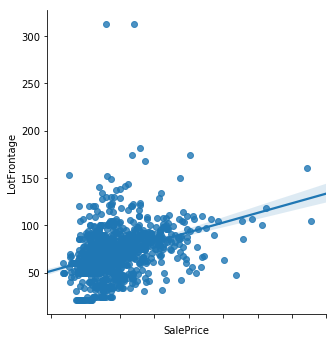

In [5]:
# ambiguous
sns.lmplot(data=train, x="SalePrice", y="LotFrontage").set(xticklabels=[])

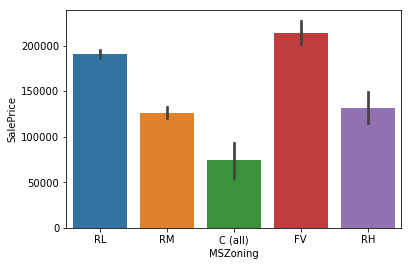

In [6]:
# useful
sns.barplot(data=train, x="MSZoning", y="SalePrice")

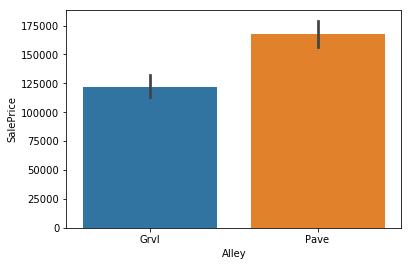

In [7]:
# useful
sns.barplot(data=train, x="Alley", y="SalePrice")

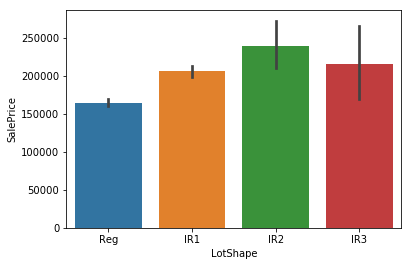

In [8]:
# useless
sns.barplot(data=train, x="LotShape", y="SalePrice")

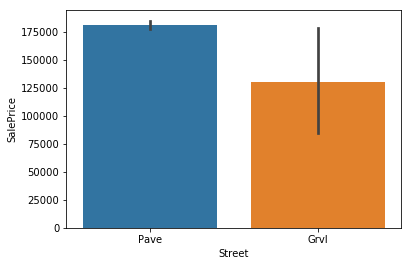

In [9]:
# useless
sns.barplot(data=train, x="Street", y="SalePrice")

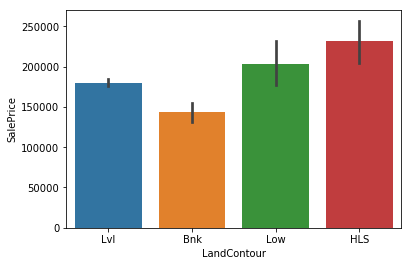

In [10]:
# useless
sns.barplot(data=train, x="LandContour", y="SalePrice")

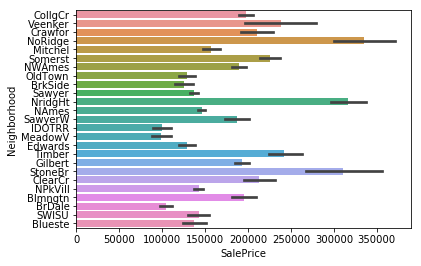

In [11]:
# useful?
sns.barplot(data=train, y="Neighborhood", x="SalePrice")

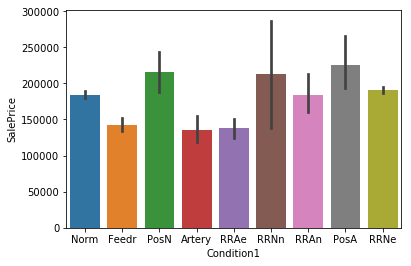

In [12]:
# turns out as useless
sns.barplot(data=train, x="Condition1", y="SalePrice")

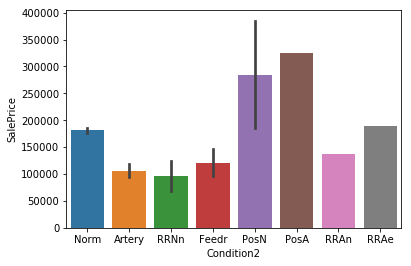

In [13]:
# useless
sns.barplot(data=train, x="Condition2", y="SalePrice")

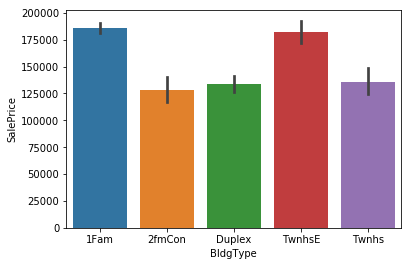

In [14]:
# useful
sns.barplot(data=train, x="BldgType", y="SalePrice")

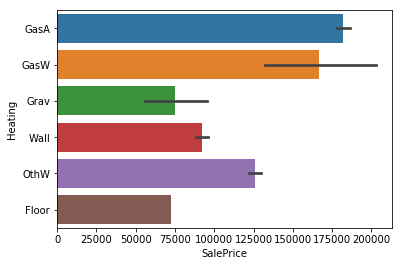

In [49]:
# ambiguous
sns.barplot(data=train, y="Heating",x="SalePrice")

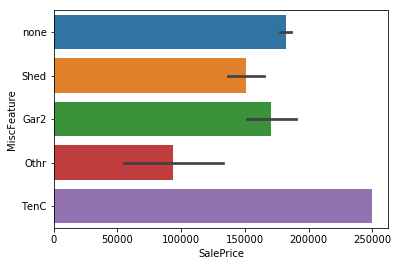

In [51]:
sns.barplot(data=train, y="MiscFeature", x="SalePrice")

KeyError: u"None of [Index([u'Lattitude', u'Longtitude'], dtype='object')] are in the [columns]"

# Preprocessing

In [15]:
missing_train_cols = train.columns[train.isnull().any()]
missing_train_cols

Index([u'LotFrontage', u'Alley', u'MasVnrType', u'MasVnrArea', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2',
       u'Electrical', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature'],
      dtype='object')

In [16]:
missing_test_cols = test.columns[test.isnull().any()]
missing_test_cols

Index([u'MSZoning', u'LotFrontage', u'Alley', u'Utilities', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'MasVnrArea', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'BsmtFullBath',
       u'BsmtHalfBath', u'KitchenQual', u'Functional', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars',
       u'GarageArea', u'GarageQual', u'GarageCond', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType'],
      dtype='object')

In [17]:
# Get list of categorical variables
s = (train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols
# data deemed to be useful: MSZoning, Street, Alley, LotShape

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [18]:
for col in object_cols:
    train[col] = train[col].replace(np.nan, 'none')
    test[col] = test[col].replace(np.nan, 'none')

In [19]:
encoded_cols = ['MSZoning', 'Alley', 'LandContour', 'Utilities']
for col in encoded_cols:
    print(col)
    uniques = set(np.concatenate([train[col].unique(), test[col].unique()]))
    for u in uniques:
        print('%s, %s' %(u, u in train[col].unique()))
        print('%s, %s' %(u, u in test[col].unique()))
# train = pd.get_dummies(train, columns=encoded_cols)
# test = pd.get_dummies(test, columns=encoded_cols)
# tSalePrice = train.SalePrice
# train.columns = test.columns

MSZoning
none, False
none, True
FV, True
FV, True
C (all), True
C (all), True
RL, True
RL, True
RM, True
RM, True
RH, True
RH, True
Alley
Grvl, True
Grvl, True
none, True
none, True
Pave, True
Pave, True
LandContour
Bnk, True
Bnk, True
Lvl, True
Lvl, True
HLS, True
HLS, True
Low, True
Low, True
Utilities
AllPub, True
AllPub, True
none, False
none, True
NoSeWa, True
NoSeWa, False


In [20]:
train_encoded = train.copy()
test_encoded = test.copy()
train_encoded.MSZoning = train_encoded.MSZoning.replace('C (all)', 'C')
test_encoded.MSZoning = test_encoded.MSZoning.replace('C (all)', 'C')

In [21]:
OHE_cols = ["Alley", "MSZoning", 'LandContour']
train_encoded = pd.get_dummies(train_encoded, columns=OHE_cols)
test_encoded = pd.get_dummies(test_encoded, columns=OHE_cols)

In [22]:
def encode_neighborhood(target_data):
    target_data['NeighborhoodA'] = map(lambda x: x == 'NoRidge' or x == 'Sawyer' or x== 'StoneBr', list(target_data.Neighborhood))
encode_neighborhood(train_encoded)
encode_neighborhood(test_encoded)

In [23]:
def encode_bldgType(target_data):
    target_data['BldgTypeA'] = map(lambda x: x == '1Fam' or x == 'TwnhsE', list(target_data.BldgType))
encode_bldgType(train_encoded)
encode_bldgType(test_encoded)

In [24]:
print(list(train_encoded.columns))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',

# Defining Model

In [25]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', \
            'Alley_Pave', 'Alley_Grvl', \
           'MSZoning_C', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', \
            'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', \
            'NeighborhoodA', 'BldgTypeA'
           ]

In [26]:
y_price = train.SalePrice

In [27]:
X_train = train_encoded[features]
X_test = test_encoded[features]
print(X_train.shape)
print(X_test.shape)

(1460, 20)
(1459, 20)


In [28]:
# Imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train = pd.DataFrame(imputer.fit_transform(X_train))
X_test = pd.DataFrame(imputer.transform(X_test))

# Training / Tuning

In [29]:
# n_estimators_list = [100, 200, 300, 400, 500]

# train_X, val_X, train_y, val_y = train_test_split(X_train, y_price, random_state=0)

# for n_estimators in n_estimators_list:
#     _model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
#     _model.fit(train_X, train_y)
#     eval_prediction_HO = _model.predict(val_X)
#     MAE = mean_absolute_error(val_y,eval_prediction_HO)
#     print("n_estimators %d MAE: %d" %(n_estimators, MAE))

In [30]:
# max_depth_list = [5, 10, 50, 100]
# for max_depth in max_depth_list:
#     _model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
#     _model.fit(train_X, train_y)
#     eval_prediction_HO = _model.predict(val_X)
#     MAE = mean_absolute_error(val_y,eval_prediction_HO)
#     print("max_depth %d MAE: %d" %(max_depth, MAE))

In [31]:
model = RandomForestRegressor(random_state=0, n_estimators=400)
model.fit(X_train, y_price)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# Evaluation

In [32]:
eval_prediction_CV = cross_val_predict(model, X_train, y_price, cv=5)
eval_prediction_CV

array([212016.08  , 164387.375 , 213916.165 , ..., 209571.2625,
       123336.0575, 164199.42  ])

In [33]:
RMSLE = np.sqrt(mean_squared_log_error(eval_prediction_CV, y_price))
RMSLE
# n_estimators = default
# 0.18562526054313422
# n_estimators = 400
# 0.1830843358144692
# n_estimators=200, criterion='mae'
# 0.18318779010386893
# OHE - Alley
# 0.18306729773968416
# OHE - Alley + MSZoning
# 0.18094910550286936
# OHE - Alley + MSZoning + LandContour
# 0.18000052036709382
# Neighborhood == 'NoRidge' or x == 'Sawyer' or x == 'StoneBr'
# 0.17968674197613824
# BldgType x == '1Fam' or x == 'TwnhsE'
# 0.17833173684185943


0.17833173684185943

In [34]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_price, random_state=0)
model.fit(train_X, train_y)
eval_prediction_HO = model.predict(val_X)
MAE = mean_absolute_error(val_y, eval_prediction_HO)
MAE
# n_estimators = default
# 24396.513744292235
# n_estimators = 400
# 22907.489858734512
# n_estimators = 200 & criterion = 'mae'
# 22907.489858734512
# OHE - Alley
# 22807.93428287671
# OHE - Alley + MSZoning
# 22744.643452739725
# OHE - Alley + MSZoning + LandContour
# 22723.0043770711
# Neighborhood x == 'NoRidge' or x == 'Sawyer' or x == 'StoneBr'
# 22621.183532028703
# BldgType x == '1Fam' or x == 'TwnhsE'
# 0.17833173684185943

22397.143009947817

# Prediction

In [35]:
# refitting original data
model.fit(X_train, y_price)
verdict = model.predict(X_test)
verdict

array([119629.8775, 154868.6025, 183119.3375, ..., 157420.9075,
       124161.25  , 227110.1625])

# Export

In [36]:
submission = pd.read_csv('sample_submission.csv', index_col='Id')
submission.SalePrice = verdict
print(len(verdict) == len(submission.SalePrice))

True


In [37]:
submission.to_csv('result.csv')